In [25]:
from bil.m import rigS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from pathlib import Path
from scipy.optimize import curve_fit
from scipy import stats

# zstd

In [68]:
runID_list = ['U201128_01','U201129_01','U201130_01','U201201_01','U201202_01',
              'U201203_01','U201204_01','U201205_01','U201206_01','U201207_01',
              'U201208_01','U201209_01','U201210_01']
all_data=[np.load(runID+"compression_rate_zstd.npy") for runID in runID_list]

day = []
for i in range(3,13):
    day=np.concatenate((day,[i+1]*len(all_data[i])),axis=0)
    
cr_pre = np.concatenate((all_data[0],all_data[1],all_data[2]),axis=0)
cr_post = np.concatenate((all_data[3],all_data[4],all_data[5],all_data[6],all_data[7],all_data[8],all_data[9],all_data[10],all_data[11],all_data[12]),axis=0)
    
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, day, cr_post)
xdata=np.array([4,5,6,7,8,9,10,11,12,13],dtype=np.float64)

In [69]:
stats.levene(cr_pre, cr_post)

LeveneResult(statistic=436.38922256860485, pvalue=7.415271864283004e-96)

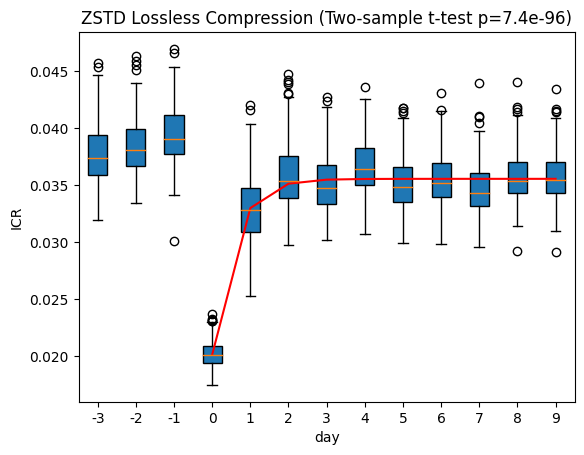

In [70]:
figure,axes=plt.subplots()
axes.boxplot(all_data,patch_artist=True);
plt.setp(axes, xticks=[1,2,3,4,5,6,7,8,9,10,11,12,13],
         xticklabels=[-3,-2,-1,0,1,2,3,4,5,6,7,8,9]);
axes.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt));
plt.title("ZSTD Lossless Compression (Two-sample t-test p=7.4e-96)");
plt.xlabel("day");
plt.ylabel("ICR");

# gzip

In [71]:
all_data=[np.load(runID+"compression_rate_gzip.npy") for runID in runID_list]

day = []
for i in range(3,13):
    day=np.concatenate((day,[i+1]*len(all_data[i])),axis=0)
    
cr_pre = np.concatenate((all_data[0],all_data[1],all_data[2]),axis=0)
cr_post = np.concatenate((all_data[3],all_data[4],all_data[5],all_data[6],all_data[7],all_data[8],all_data[9],all_data[10],all_data[11],all_data[12]),axis=0)
    
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, day, cr_post)
xdata=np.array([4,5,6,7,8,9,10,11,12,13],dtype=np.float64)

In [72]:
stats.levene(cr_pre, cr_post)

LeveneResult(statistic=460.4698310430528, pvalue=5.5887432074083624e-101)

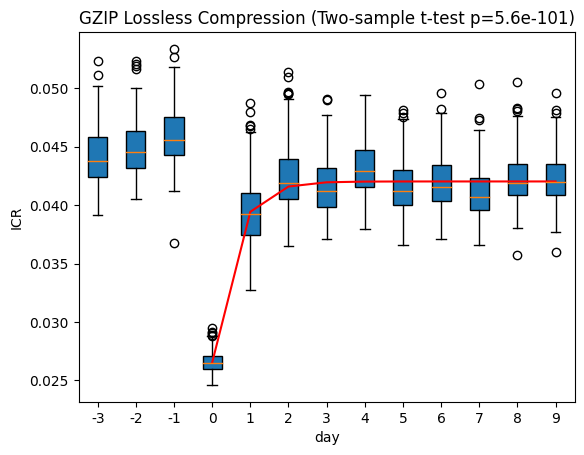

In [73]:
figure,axes=plt.subplots()
axes.boxplot(all_data,patch_artist=True);
plt.setp(axes, xticks=[1,2,3,4,5,6,7,8,9,10,11,12,13],
         xticklabels=[-3,-2,-1,0,1,2,3,4,5,6,7,8,9]);
axes.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt));
plt.title("GZIP Lossless Compression (Two-sample t-test p=5.6e-101)");
plt.xlabel("day");
plt.ylabel("ICR");

## h264

In [74]:
runID_list = ['U201128_01','U201129_01','U201130_01','U201201_01','U201202_01',
              'U201203_01','U201204_01','U201205_01','U201206_01','U201207_01',
              'U201208_01','U201209_01','U201210_01']
all_data=[np.load(runID+"compression_rate_h264.npy") for runID in runID_list]

day = []
for i in range(3,13):
    day=np.concatenate((day,[i+1]*len(all_data[i])),axis=0)
    
cr_pre = np.concatenate((all_data[0],all_data[1],all_data[2]),axis=0)
cr_post = np.concatenate((all_data[3],all_data[4],all_data[5],all_data[6],all_data[7],all_data[8],all_data[9],all_data[10],all_data[11],all_data[12]),axis=0)
    
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, day, cr_post)
xdata=np.array([4,5,6,7,8,9,10,11,12,13],dtype=np.float64)

In [75]:
stats.levene(cr_pre, cr_post)

LeveneResult(statistic=449.5417852692942, pvalue=1.1783153133416878e-98)

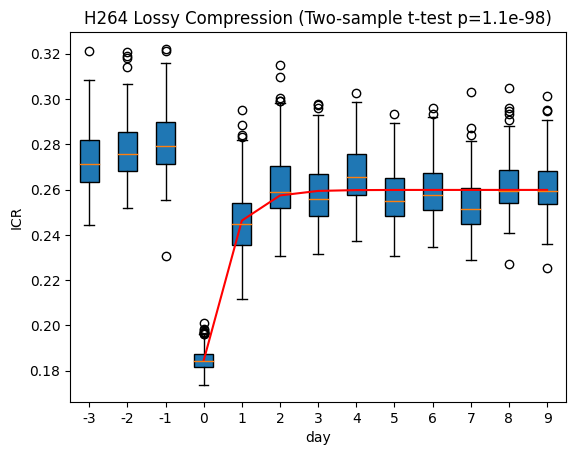

In [76]:
figure,axes=plt.subplots()
axes.boxplot(all_data,patch_artist=True);
plt.setp(axes, xticks=[1,2,3,4,5,6,7,8,9,10,11,12,13],
         xticklabels=[-3,-2,-1,0,1,2,3,4,5,6,7,8,9]);
axes.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt));
plt.title("H264 Lossy Compression (Two-sample t-test p=1.1e-98)");
plt.xlabel("day");
plt.ylabel("ICR");

/tmp/ipykernel_4856/2300590714.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')
/tmp/ipykernel_4856/2300590714.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


Text(0.5, 1.0, 'H264 Lossy Compression')

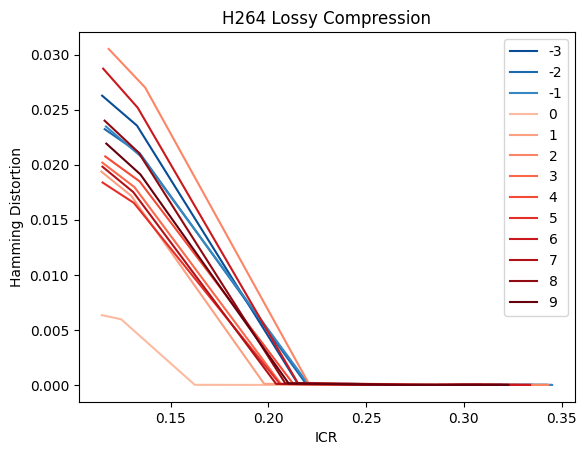

In [77]:
import matplotlib.cm as cm

cmap = cm.get_cmap('Reds')
gradient = np.linspace(0, 1, len(runID_list))
colors_r = cmap(gradient)[3:]

cmap = cm.get_cmap('Blues')
gradient = np.linspace(0, 1, 10)
colors_b = np.flip(cmap(gradient)[-4:-1],axis=0)

colors= np.concatenate((colors_b, colors_r), axis=0)

runID_list = ['U201128_01','U201129_01','U201130_01','U201201_01','U201202_01',
              'U201203_01','U201204_01','U201205_01','U201206_01','U201207_01',
              'U201208_01','U201209_01','U201210_01']
icr_data=[np.mean(np.load(runID+"_icr_h264_rates.npy"),axis=0)*50 for runID in runID_list]
# icr_data=[1 / icr for icr in icr_data]
d_data=[np.mean(np.load(runID+"_distortion_h264_rates.npy"),axis=0)*50 for runID in runID_list]

fig, ax = plt.subplots()

for idx in range(len(runID_list)):
    plt.plot(icr_data[idx],d_data[idx], c=colors[idx], label = str(idx-3))
    
# ax.set_yscale('log')
plt.legend()
plt.xlabel('ICR')
plt.ylabel('Hamming Distortion')
plt.title("H264 Lossy Compression")